In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.shape

(21613, 21)

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data['date'].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [9]:
data['yr_built'].head()

0    1955
1    1951
2    1933
3    1965
4    1987
Name: yr_built, dtype: int64

In [10]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [11]:
data['age'] = data['date'].apply(lambda x: int(x[:4])) - data['yr_built']

In [12]:
data['age'].unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1])

In [13]:
# This is not possible, house cannot be sold before it was built
data[data['age']<0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
1763,1832100030,20140625T000000,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,-1
2687,3076500830,20141029T000000,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,47.5756,-122.316,1440,4800,-1
7526,9520900210,20141231T000000,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,-1
8039,1250200495,20140624T000000,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,-1
14489,2770601530,20140826T000000,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,-1
17098,9126100346,20140617T000000,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,-1
19805,9126100765,20140801T000000,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,-1
20770,9310300160,20140828T000000,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,-1
20852,1257201420,20140709T000000,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,-1
20963,6058600220,20140731T000000,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,47.5951,-122.301,1350,3000,-1


In [14]:
data = data[data['age']>=0]

In [15]:
data['year_sold'] = data['date'].apply(lambda x:int(x[:4]))

In [16]:
data['year_sold'].isna().sum()
data['year_sold'].unique()

array([2014, 2015])

In [17]:
data['yrs_since_renowation'] = np.where(data['yr_renovated']==0, data['year_sold'] - data['yr_built'],
                                        data['year_sold']-data['yr_renovated'])

In [18]:
data['yrs_since_renowation'].isna().sum()
data['yrs_since_renowation'].unique()

array([ 59,  23,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  81, 110,  18,  14,  30,   0,  92,  62,
        64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,  74,
        22,  51,  53,   8,  26,  75,  48,  39, 104,  31,   4,  15,  69,
        65,  90,  27,  47,  54, 109,   7,  68,  61,   1,  38,  16, 113,
        21, 114,  94,  45, 100,  96,  97,  86, 103,  78,  77,  76, 107,
        84,  40,  57, 102,  17,  71,  63,  91,  42,   3,  95,   2,  32,
        56,  70,  44, 112,   5,  80, 101,  83, 106, 108, 111,  79,  -1])

In [19]:
# This is again wrong, renovation has to be done before selling
data[data['yrs_since_renowation']<0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,yrs_since_renowation
2295,8712100320,20140728T000000,585000.0,5,2.75,2350,4178,1.5,0,0,3,8,1520,830,1922,2015,98112,47.6388,-122.300,1920,4178,92,2014,-1
7097,9141100005,20141028T000000,285000.0,4,3.50,2770,10505,2.0,0,0,3,8,2770,0,1940,2015,98133,47.7412,-122.355,1760,10505,74,2014,-1
11599,7284900030,20140522T000000,850000.0,4,3.25,3090,6744,2.0,0,4,3,9,3090,0,1923,2015,98177,47.7680,-122.388,2020,6656,91,2014,-1
14859,3585900665,20140606T000000,805000.0,5,2.50,4600,19831,1.0,0,3,3,9,2300,2300,1956,2015,98177,47.7608,-122.378,2890,19831,58,2014,-1
15687,3585900190,20141006T000000,825000.0,3,2.50,3400,38400,1.0,0,4,3,8,1870,1530,1955,2015,98177,47.7611,-122.372,3400,24338,59,2014,-1
18575,8935100100,20140701T000000,476000.0,4,3.00,2890,6885,1.0,0,0,3,7,1590,1300,1945,2015,98115,47.6763,-122.282,2180,6885,69,2014,-1


In [20]:
data = data[data['yrs_since_renowation']>=0]

In [21]:
data.shape

(21595, 24)

In [22]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,yrs_since_renowation
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,2014,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,2015,28


In [23]:
data['month_sold'] = data['date'].apply(lambda x:int(x[4:6]))

In [24]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,yrs_since_renowation,month_sold
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59,2014,59,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,2014,23,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,2015,82,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49,2014,49,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,2015,28,2


In [25]:
data = data.drop(['id','date','yr_built','yr_renovated'],axis=1)

In [26]:
data.shape

(21595, 21)

In [27]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,year_sold,yrs_since_renowation,month_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,2014,59,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,2014,23,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,2015,82,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,2014,49,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,2015,28,2


In [28]:
def vif_scores(df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = df.columns
    vif_df['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif_df

In [29]:
vif_scores(data.iloc[:,1:])

,Features,vif
0,bedrooms,2.335155e+01
1,bathrooms,2.877250e+01
2,sqft_living,inf
3,sqft_lot,2.382289e+00
4,floors,1.745566e+01
5,waterfront,1.211198e+00
6,view,1.565976e+00
7,condition,3.558155e+01
8,grade,1.488822e+02
9,sqft_above,inf


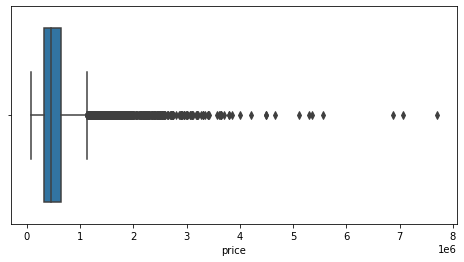

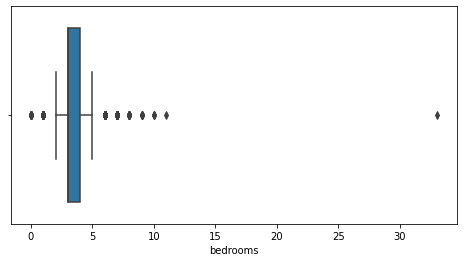

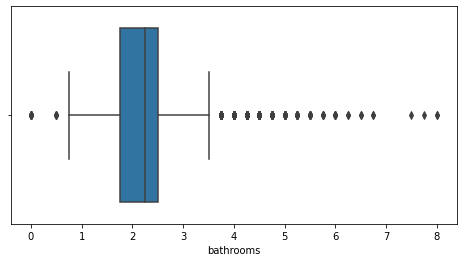

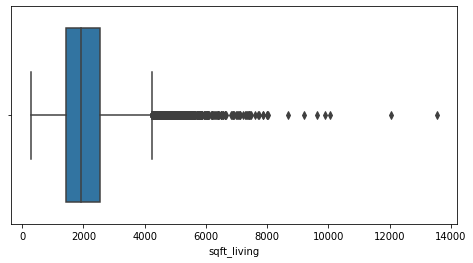

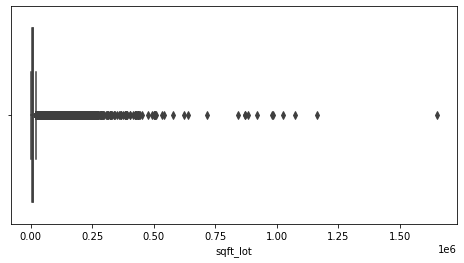

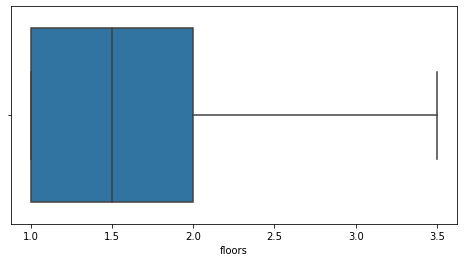

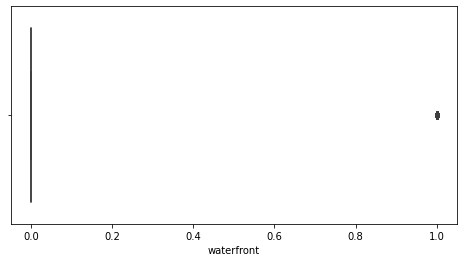

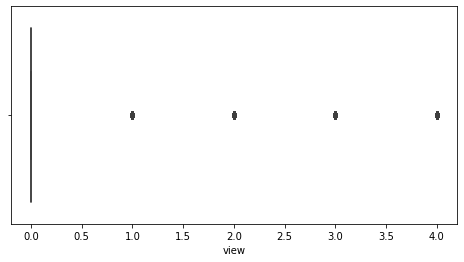

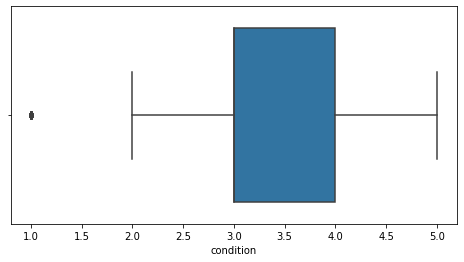

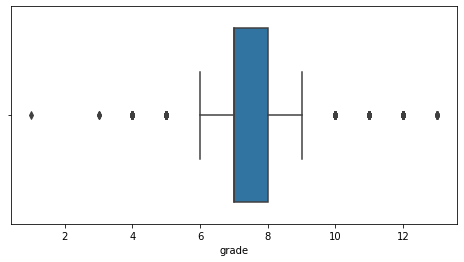

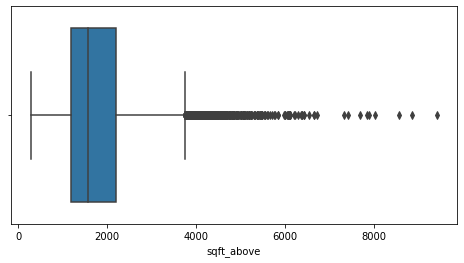

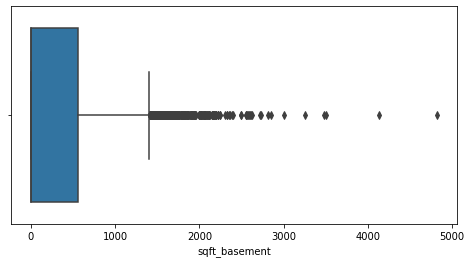

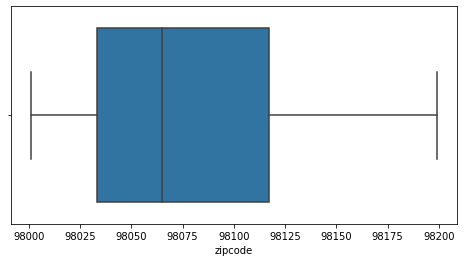

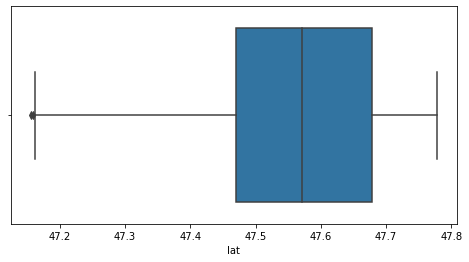

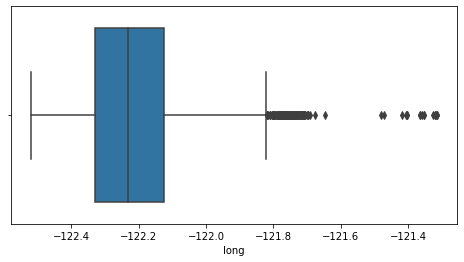

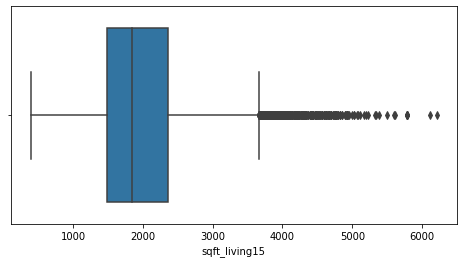

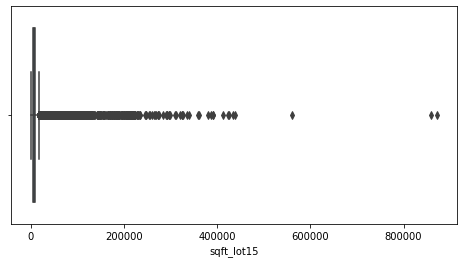

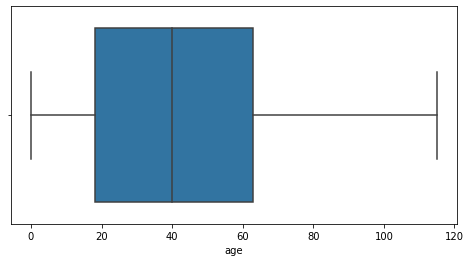

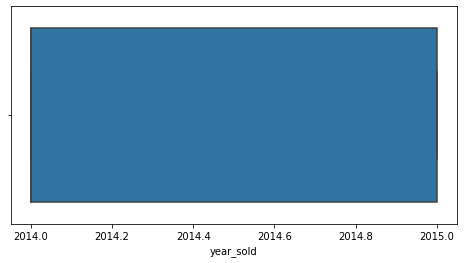

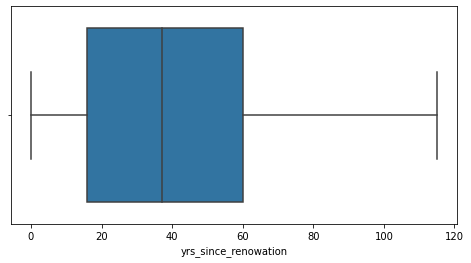

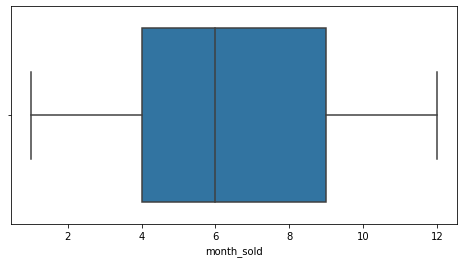

In [30]:
for i in data.columns.values:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[i])

In [31]:
len(data[data['sqft_lot15']>5000])

16455

In [32]:
data = data[data['bedrooms']<=6]

In [33]:
data = data[data['bathrooms']<=5]

In [34]:
data['rooms'] = data['bedrooms'] + data['bathrooms']

In [35]:
data = data[data['sqft_living']<=8000]

In [36]:
data = data[data['sqft_lot']<=750000]

In [37]:
data = data[data['sqft_above']<=5000]

In [38]:
data = data[data['sqft_basement']<=2000]

In [39]:
data = data[data['sqft_living15']<=5000]

In [40]:
data = data.drop(['zipcode','sqft_above','sqft_basement','bedrooms','bathrooms','condition'],axis=1)

In [41]:
data.shape

(21356, 16)

In [42]:
data.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,grade,lat,long,sqft_living15,sqft_lot15,age,year_sold,yrs_since_renowation,month_sold,rooms
0,221900.0,1180,5650,1.0,0,0,7,47.5112,-122.257,1340,5650,59,2014,59,10,4.00
1,538000.0,2570,7242,2.0,0,0,7,47.7210,-122.319,1690,7639,63,2014,23,12,5.25
2,180000.0,770,10000,1.0,0,0,6,47.7379,-122.233,2720,8062,82,2015,82,2,3.00
3,604000.0,1960,5000,1.0,0,0,7,47.5208,-122.393,1360,5000,49,2014,49,12,7.00
4,510000.0,1680,8080,1.0,0,0,8,47.6168,-122.045,1800,7503,28,2015,28,2,5.00


In [43]:
data = data.sample(frac=1).reset_index(drop=True)
data_train = data.iloc[:17000,:]
data_test = data.iloc[17000:,:]

## CROSS VALIDATION 

In [44]:
kf = StratifiedKFold(n_splits=5)

In [45]:
data_train['kfold'] = -1

In [46]:
for fold_,(t_,v_) in enumerate(kf.split(X=data_train.drop('price',axis=1),y=data_train['price'])):
    data_train.loc[v_,'kfold'] = fold_

In [47]:
scaler = StandardScaler()

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
for fold in range(5):
    train = data_train[data_train['kfold']!=fold].reset_index(drop=True)
    valid = data_train[data_train['kfold']==fold].reset_index(drop=True)
    
    x_train = train.drop(['price','kfold'],axis=1)
    col = x_train.columns
    y_train = train['price']
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    
    x_valid = valid.drop(['price','kfold'],axis=1)
    y_valid = valid['price']
    x_valid = scaler.transform(x_valid)
    
    linReg = RandomForestRegressor(max_depth=7)#linear_model.LinearRegression()
    linReg.fit(x_train,y_train)
    
    preds_on_valid = linReg.predict(x_valid)
    rmse_on_valid = np.sqrt(metrics.mean_squared_error(y_valid,preds_on_valid))
    
    preds_on_train = linReg.predict(x_train)
    rmse_on_train = np.sqrt(metrics.mean_squared_error(y_train,preds_on_train))
    
    r_sq = metrics.r2_score(y_valid,preds_on_valid)
    
    print(f'For fold = {fold}\n Mean of y = {y_valid.mean()}\n RMSE on train = {rmse_on_train}\n RMSE on valid = {rmse_on_valid}\n R Square = {r_sq}')
    print('-'*100)

For fold = 0
 Mean of y = 531273.2144117648
 RMSE on train = 121797.0198095532
 RMSE on valid = 139132.82735273067
 R Square = 0.8252274338588528
----------------------------------------------------------------------------------------------------
For fold = 1
 Mean of y = 528962.8402941177
 RMSE on train = 121431.27998886215
 RMSE on valid = 141831.85843735014
 R Square = 0.810772652425904
----------------------------------------------------------------------------------------------------
For fold = 2
 Mean of y = 528104.3426470588
 RMSE on train = 121637.04072947819
 RMSE on valid = 144534.02198658645
 R Square = 0.8156423166590278
----------------------------------------------------------------------------------------------------
For fold = 3
 Mean of y = 526163.8144117647
 RMSE on train = 124539.44219760578
 RMSE on valid = 136017.75851355144
 R Square = 0.8238575494726753
----------------------------------------------------------------------------------------------------
For fold =

In [ ]:
linReg.coef_

In [ ]:
col